In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/tabular-playground-series-jul-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2021/train.csv
/kaggle/input/tabular-playground-series-jul-2021/test.csv


In [2]:
train = pd.read_csv('../input/tabular-playground-series-jul-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-jul-2021/test.csv')
subm = pd.read_csv('../input/tabular-playground-series-jul-2021/sample_submission.csv')

In [3]:
test.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,2011-01-01 00:00:00,8.0,41.3,0.4375,1108.8,745.7,797.1,880.0,1273.1
1,2011-01-01 01:00:00,5.1,51.7,0.4564,1249.5,864.9,687.9,972.8,1714.0
2,2011-01-01 02:00:00,5.8,51.5,0.4689,1102.6,878.0,693.7,941.9,1300.8
3,2011-01-01 03:00:00,5.0,52.3,0.4693,1139.7,916.2,725.6,1011.0,1283.0
4,2011-01-01 04:00:00,4.5,57.5,0.4650,1022.4,838.5,871.5,967.0,1142.3


In [4]:
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [5]:
train.columns

Index(['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'],
      dtype='object')

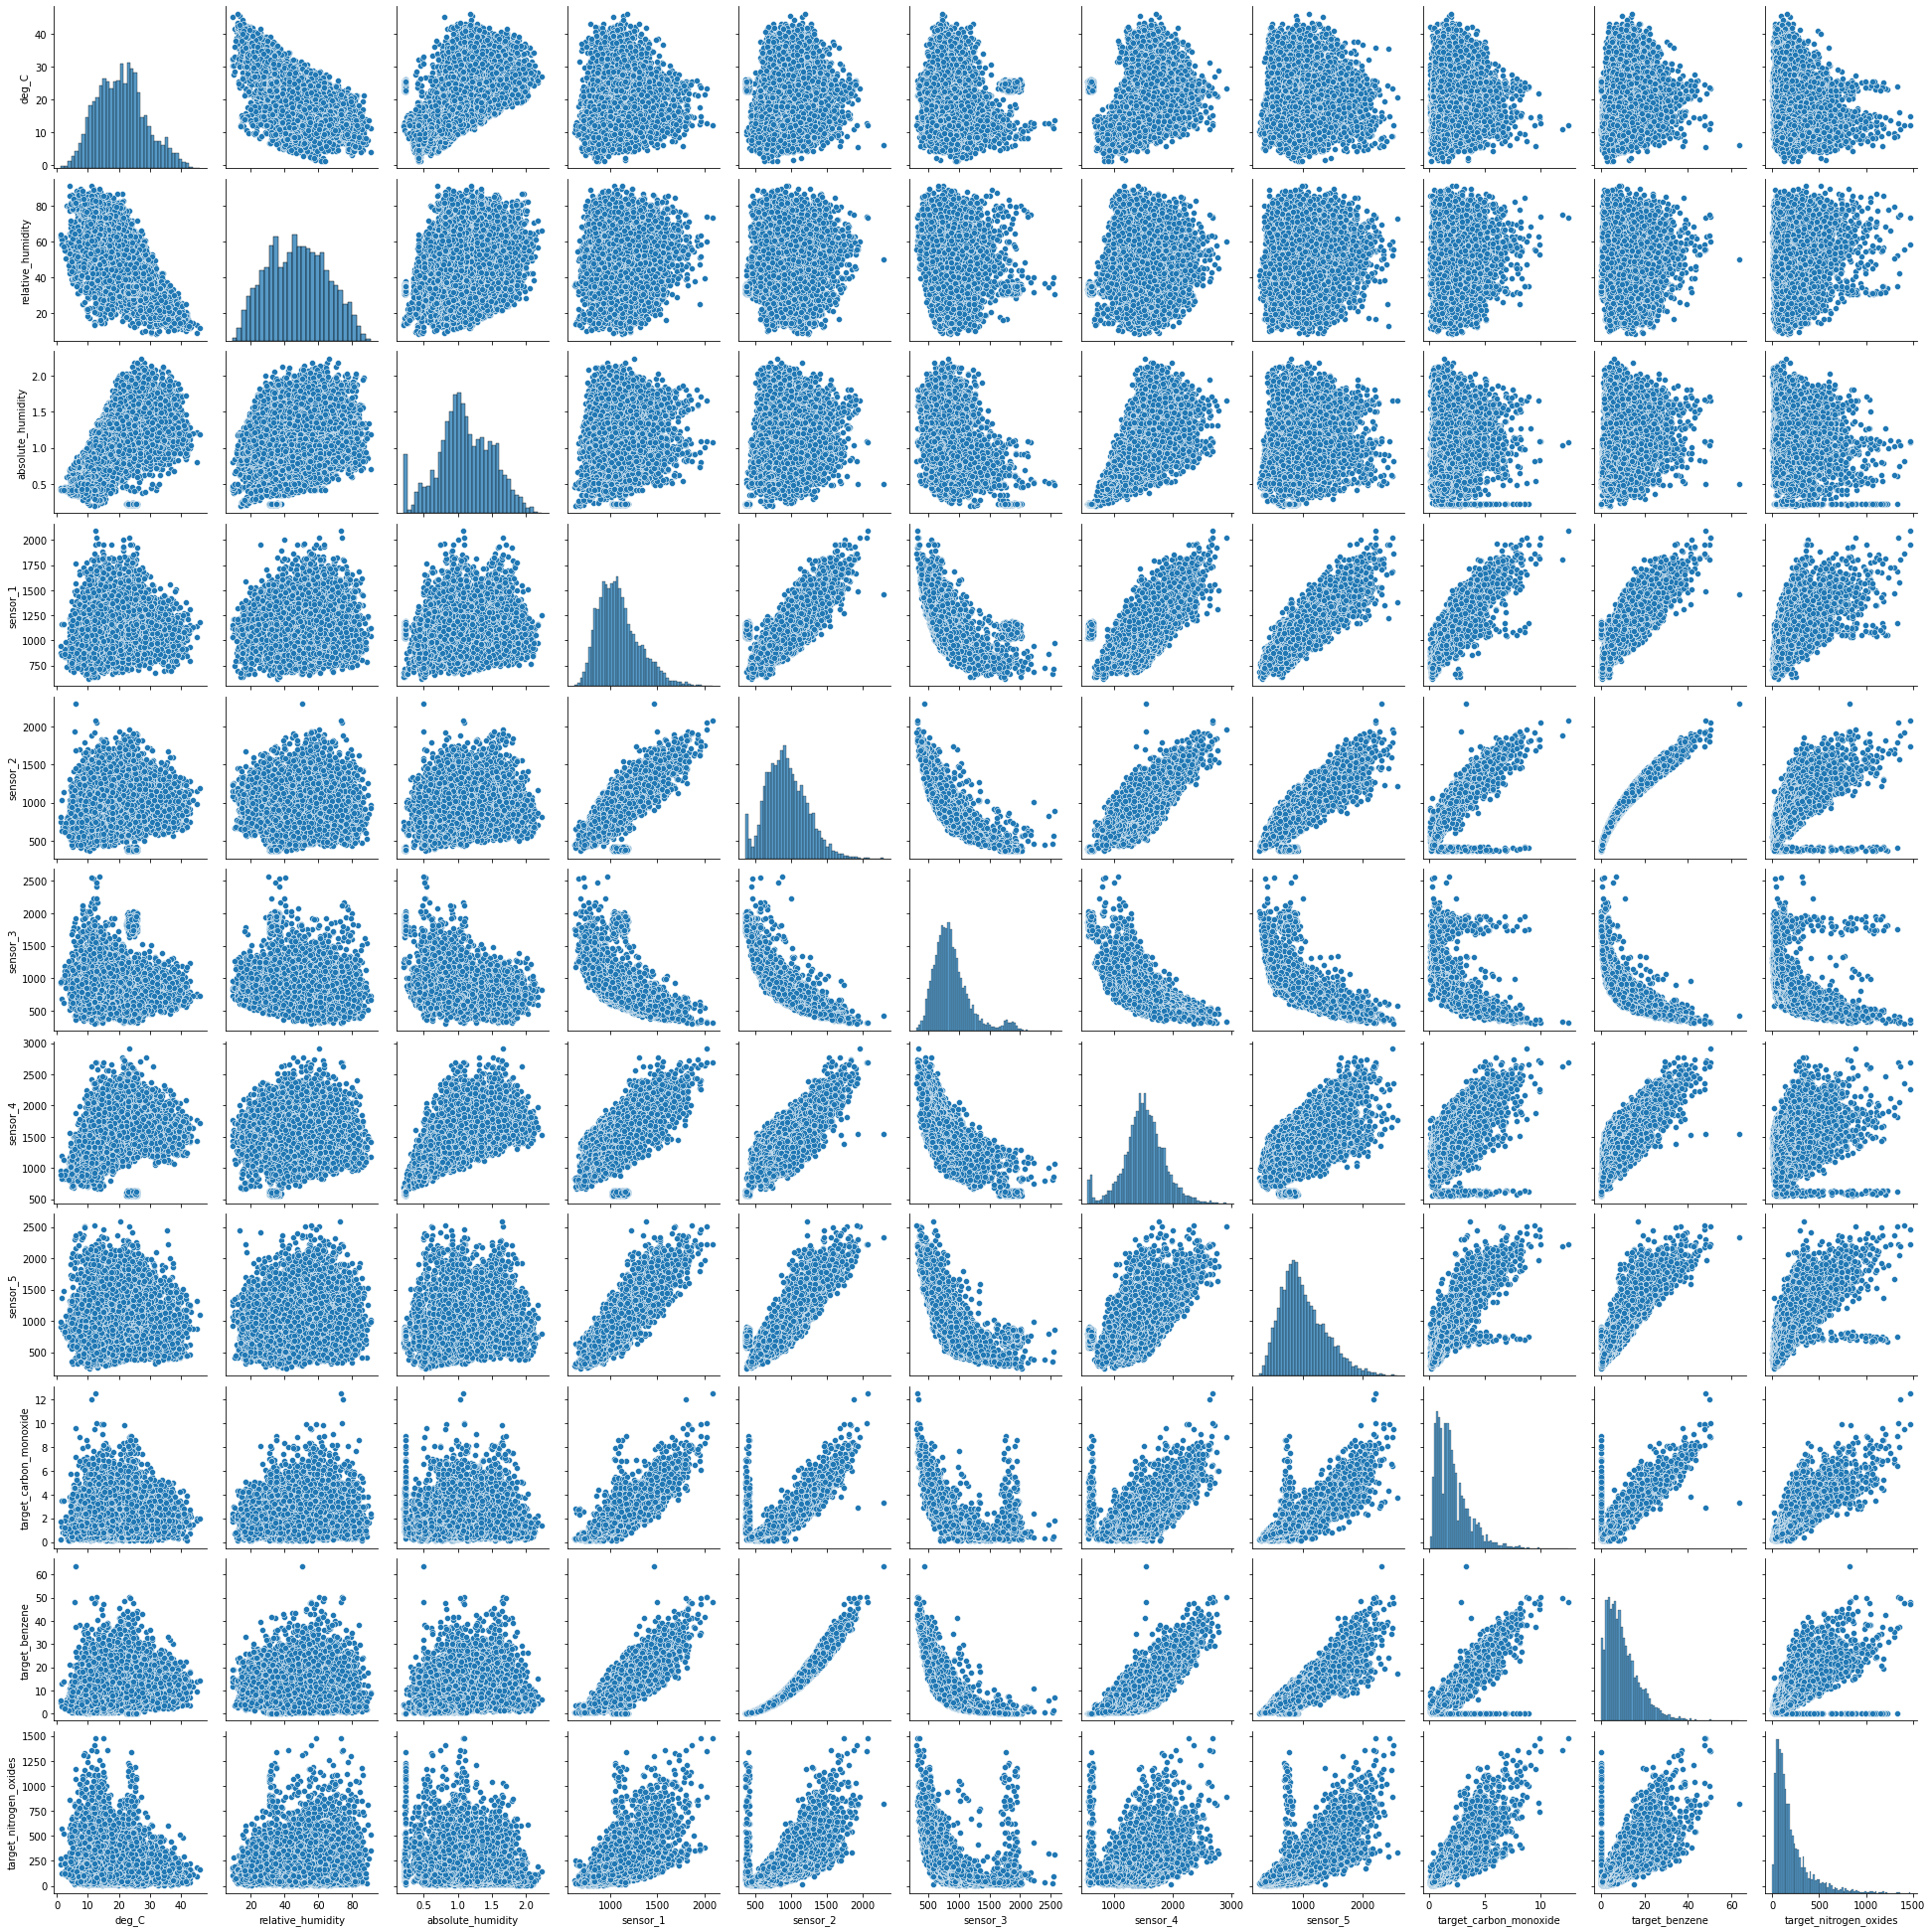

In [6]:
sns.pairplot(train);

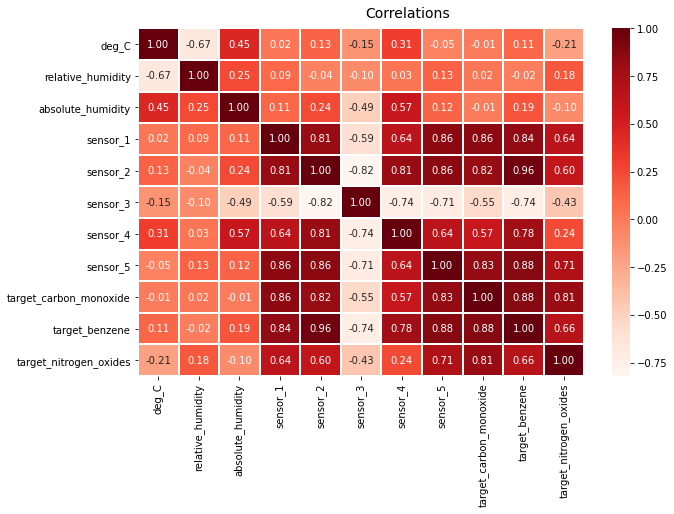

In [7]:
# for visualizing correlations
f, ax = plt.subplots(figsize=(10, 6))
corr = train.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlations', fontsize=14)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


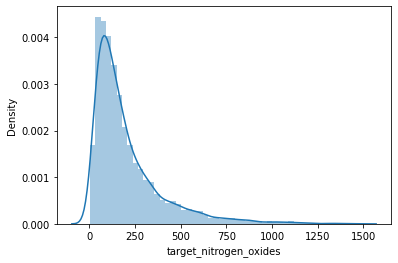

In [8]:
sns.distplot(train['target_nitrogen_oxides']);

In [9]:
columns = test.columns[1:]
columns

Index(['deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5'],
      dtype='object')

In [10]:
X = train[columns].values
X_test = test[columns].values
value_1 = train['target_carbon_monoxide'].values.reshape(-1,1)
value_2 = train['target_benzene'].values.reshape(-1,1)
value_3 = train['target_nitrogen_oxides'].values.reshape(-1,1)

In [11]:
xgb_params ={'learning_rate':[0.1,0.5],
            'max_depth':[1,2],
            'n_estimators':[50,100],
            'colsample_bytree':[0.3,0.7]} 

In [12]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate = 0.1,
                  max_depth = 2,
                  n_estimators=100,
                  colsample_bytree=0.7)
xgb.fit(X, value_1)
subm['target_carbon_monoxide'] = xgb.predict(X_test)

xgb.fit(X, value_2)
subm['target_benzene'] = xgb.predict(X_test)

xgb.fit(X, value_3)
subm['target_nitrogen_oxides'] = xgb.predict(X_test)

subm.head()

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,1.909951,6.824295,336.751801
1,2011-01-01 01:00:00,2.710394,9.593152,454.219910
2,2011-01-01 02:00:00,2.433278,9.088799,363.117432
3,2011-01-01 03:00:00,2.447269,9.099537,370.300964
4,2011-01-01 04:00:00,1.705049,6.895240,272.730255


In [13]:
subm.to_csv('submission_xgboost_1.csv', index=False)